In [ ]:
using Pkg

# Add all required packages for testing
packages = [
    "Test",
    "CSV",
    "DataFrames",
    "DifferentialEquations",
    "StatsBase",
    "Plots",
    "SciMLSensitivity",
    "LsqFit",
    "DiffEqParamEstim",
    "Optimization",
    "ForwardDiff",
    "OptimizationOptimJL",
    "OptimizationBBO",
    "BlackBoxOptim",
    "Statistics",
    "RecursiveArrayTools",
    "OptimizationAutoDiff" 
]

println("Installing required packages for testing...")
for pkg in packages
    println("Adding package: $pkg")
    Pkg.add(pkg)
end
println("Package installation complete!")

Installing required packages for testing...
Adding package: Test


   Resolving package versions...
    Updating `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  [8dfed614] + Test v1.11.0
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: CSV


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: DataFrames


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: DifferentialEquations


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: StatsBase


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: Plots


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: SciMLSensitivity


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: LsqFit


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: DiffEqParamEstim


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: Optimization


   Resolving package versions...
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`


Adding package: ForwardDiff


   Resolving package versions...
    Updating `C:\Users\MainFrameTower\.julia\environments\v1.11\Project.toml`
  [f6369f11] + ForwardDiff v1.2.1
    Updating `C:\Users\MainFrameTower\.julia\environments\v1.11\Manifest.toml`
  [f6369f11] ↑ ForwardDiff v0.10.39 ⇒ v1.2.1
Precompiling project...
   3004.1 ms  ✓ ForwardDiff
    883.2 ms  ✓ FastPower → FastPowerForwardDiffExt
    868.4 ms  ✓ PreallocationTools → PreallocationToolsForwardDiffExt
    993.8 ms  ✓ DifferentiationInterface → DifferentiationInterfaceForwardDiffExt
   1258.5 ms  ✓ RecursiveArrayTools → RecursiveArrayToolsForwardDiffExt
   1313.5 ms  ✓ Unitful → ForwardDiffExt
   1428.7 ms  ✓ ForwardDiff → ForwardDiffStaticArraysExt
   1560.1 ms  ✓ Interpolations → InterpolationsForwardDiffExt
    822.9 ms  ✓ OptimizationBase → OptimizationForwardDiffExt
   1413.9 ms  ✓ NNlib → NNlibForwardDiffExt
   1880.2 ms  ✓ BracketingNonlinearSolve → BracketingNonlinearSolveForwardDiffExt
   2100.4 ms  ✓ NonlinearSolveBase → NonlinearSolveBase

In [1]:
using Pkg
using Random
using Distributions
using StatsBase
using CSV
using Plots
using DataFrames
using DifferentialEquations
using SciMLSensitivity
using LsqFit
using DifferentialEquations, RecursiveArrayTools, Plots, DiffEqParamEstim
using Optimization, ForwardDiff, OptimizationOptimJL, OptimizationBBO
using BlackBoxOptim
using StatsPlots
using DataFramesMeta
using Printf
using Statistics
using Logging

[ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa] 
┌ Warning: attempting to remove probably stale pidfile
│   path = "C:\\Users\\MainFrameTower\\.julia\\compiled\\v1.11\\BoundaryValueDiffEqFIRK\\ughQx_hHGeD.ji.pidfile"
└ @ FileWatching.Pidfile C:\Users\MainFrameTower\AppData\Local\Programs\Julia-1.11.7\share\julia\stdlib\v1.11\FileWatching\src\pidfile.jl:249


LoadError: ArgumentError: Package RecursiveArrayTools not found in current path, maybe you meant `import/using .RecursiveArrayTools`.
- Otherwise, run `import Pkg; Pkg.add("RecursiveArrayTools")` to install the RecursiveArrayTools package.

In [2]:
"""
    extract_day_averages_from_df(dfTemp)

Extracts non-missing values from a DataFrame and assigns time indices.
Returns two Float64 arrays: time points `x` and values `y`. Note that names 
for lines need to follow this pattern <celltype>_<drug_concentration>_<treated/untreated>_<Day#>_<Tile-#>_<Well/Sample>.
example: `A2780cis_15and20__Treated_Day1_Tile-1_A5`.
"""
function extract_day_averages_from_df(df::DataFrame, cell_size)
    # 1) keep only the Tile rows you care about
    df = filter(row -> occursin(r"_Tile-\d+_[^AC]\d", row.Image), df)

    # 2) pull out the day number
    extract_day(name::AbstractString) = begin
        m = match(r"(?i)day(\d+)", name)
        m !== nothing ? parse(Int, m.captures[1]) : missing
    end
    df.day = extract_day.(df.Image)
    df = dropmissing(df, :day)

    # 3) group by day, chunk into 18-tile batches, compute means
    grouped = groupby(df, :day)
    new_rows = Vector{NamedTuple{(:Day, :Average), Tuple{Int,Float64}}}()
    for g in grouped
        for i in 1:18:nrow(g)
            chunk = g[i : min(i+17, nrow(g)), :]
            avg = mean(chunk[!, Symbol("Area µm^2")])/cell_size
            push!(new_rows, (Day = unique(chunk.day)[1], Average = avg))
        end
    end

    # 4) assemble and show the small DataFrame
    df_avg = DataFrame(new_rows)
    println("This is what the data looks like:\n", df_avg)

    # 5) turn into plain Float64 vectors
    x = Float64.(df_avg.Day)
    y = Float64.(df_avg.Average)

    return x, y
end


"""
    extractData(file_name)

    Takes a data file that has one column. One column that has a header of "Day Averages"
"""

function extractData(file_name)
    df = CSV.read(file_name, DataFrame)

    x = []
    y = []
    current_day = 1
    for row in eachrow(df)
        val = row[:"Day Averages"]
        if !ismissing(val) && !isempty(strip(string(val)))  # Filters out missing or blank cells
            push!(x, current_day)
            push!(y, val)  # No need to parse
            current_day += 1
        end
    end

    x = Float64.(x)
    y = Float64.(y)
    
    return x, y
end


"""
    setUpProblem(model, xdata, ydata, solver, u0, p, tspan, bounds)

Sets up and solves an ODE fitting problem using BlackBoxOptim.
Returns optimized parameters, solution, and the problem object.
"""
function setUpProblem(model, x, y, solver, u0, p0, tspan, bounds)
    prob = ODEProblem(model, u0, tspan, p0)
    solve(prob, solver, saveat=x, reltol=1e-16, abstol=1e-16)

    loss = build_loss_objective(
        prob, solver,
        L2Loss(x, y),
        Optimization.AutoForwardDiff();
        maxiters=10_000, verbose=false
    )

    result = bboptimize(
        loss;
        SearchRange = collect(zip(first.(bounds), last.(bounds))),
        Method      = :de_rand_1_bin,
        MaxTime     = 100.0,
        TraceMode   = :silent
    )

    p̂      = best_candidate(result)
    prob̂   = ODEProblem(model, [y[1]], tspan, p̂)
    x_dense = range(x[1], x[end], length=1000)
    sol̂    = solve(prob̂, solver, reltol=1e-12, abstol=1e-12, saveat=x_dense)

    return p̂, sol̂, prob̂
end

"""
    calculate_bic(prob, xdata, ydata, solver, params)

Calculates the Bayesian Information Criterion (BIC) and Sum of Squared Residuals (SSR) for a solved ODE model.
"""
function calculate_bic(prob, x, y, solver, p)
    sol = solve(prob, solver, reltol=1e-15, abstol=1e-15, saveat=x)
    resid = y .- getindex.(sol.u, 1)
    ssr   = sum(resid .^ 2)
    k     = length(p)
    n     = length(x)
    bic   = n * log(ssr / n) + k * log(n)
    bic, ssr
end

"""
    pQuickStat(x, y, optimized_params, optimized_sol, optimized_prob, bic, ssr)

Displays a plot of model fit and prints model parameters, BIC, and SSR.
"""
function pQuickStat(x, y, p, sol, prob, bic, ssr)
    println("→ Optimized params: ", p)
    println("→ SSR: ", ssr)
    println("→ BIC: ", bic)

    plt = scatter(x, y;
        label   = "Data",
        legend  = :bottomright,
        xlabel  = "Day",
        ylabel  = "Average",
        title   = "Model Fit"
    )
    plot!(plt, sol.t, getindex.(sol.u,1); label="Model", lw=2)
    display(plt)
end



function run_single_fit(
    df::DataFrame,
    p0::Vector{<:Real};
    cell_size,
    model         = logistic!,
    fixed_params  = nothing,
    solver        = Rodas5(),
    bounds        = nothing,
    show_stats::Bool = true, 
)
    # wrap for fixed_params
    if fixed_params !== nothing
        old_model = model
        model = (du,u,p,t) -> old_model(du, u, vcat(p, fixed_params), t)
    end

    nparams = length(p0)
    bounds === nothing && (bounds = [(0.0, Inf) for _ in 1:nparams])

    x, y = extract_day_averages_from_df(df)
    tspan  = (x[1], x[end])
    u0     = [y[1]]

    p̂, sol̂, prob̂ = setUpProblem(model, x, y, solver, u0, p0, tspan, bounds)
    bic, ssr       = calculate_bic(prob̂, x, y, solver, p̂)
    show_stats && pQuickStat(x, y, p̂, sol̂, prob̂, bic, ssr)

    return (params = p̂, bic = bic, ssr = ssr, sol = sol̂)
end

# ────────────────────────────────────────────────────────────────────────────
# 1. Compare two models on the same dataset
# ────────────────────────────────────────────────────────────────────────────
"""
compare_models(
    df::DataFrame,
    name1::String, model1::Function, p0_1::Vector{<:Real};
    name2::String, model2::Function, p0_2::Vector{<:Real};
    solver               = Rodas5(),
    bounds1              = nothing,
    bounds2              = nothing,
    fixed_params1        = nothing,
    fixed_params2        = nothing,
    show_stats::Bool     = false,
    output_csv::String   = "model_comparison.csv"
)

Fits two candidate models to the same dataset via `run_single_fit`,
plots both curves over the data, prints parameter/BIC/SSR, and writes a CSV summary.
"""
function compare_models(
    df::DataFrame,
    name1::String, model1::Function, p0_1::Vector{<:Real},
    name2::String, model2::Function, p0_2::Vector{<:Real};
    solver             = Rodas5(),
    bounds1            = nothing,
    bounds2            = nothing,
    fixed_params1      = nothing,
    fixed_params2      = nothing,
    show_stats::Bool   = false,
    output_csv::String = "model_comparison.csv"
)
    # Fit model 1
    fit1 = run_single_fit(
        df, p0_1;
        model        = model1,
        fixed_params = fixed_params1,
        solver       = solver,
        bounds       = bounds1,
        show_stats   = show_stats
    )

    # Fit model 2
    fit2 = run_single_fit(
        df, p0_2;
        model        = model2,
        fixed_params = fixed_params2,
        solver       = solver,
        bounds       = bounds2,
        show_stats   = show_stats
    )

    # Extract data for plotting
    df_avg = extract_day_averages_from_df(df)
    x, y   = Float64.(df_avg.Day), Float64.(df_avg.Average)

    # Plot
    plt = scatter(
        x, y;
        label  = "Data",
        xlabel = "Day",
        ylabel = "Value",
        title  = "Model Comparison: $name1 vs $name2",
        legend = :bottomright
    )
    plot!(plt, fit1.sol.t, getindex.(fit1.sol.u,1);
          label=name1, lw=2)
    plot!(plt, fit2.sol.t, getindex.(fit2.sol.u,1);
          label=name2, lw=2, linestyle=:dash)
    display(plt)

    # Print summary
    println("=== $name1 ===")
    println("Params: $(fit1.params), BIC: $(fit1.bic), SSR: $(fit1.ssr)")
    println("=== $name2 ===")
    println("Params: $(fit2.params), BIC: $(fit2.bic), SSR: $(fit2.ssr)")

    # Save CSV
    df_out = DataFrame(
        Model  = [name1, name2],
        Params = [string(fit1.params), string(fit2.params)],
        BIC    = [fit1.bic, fit2.bic],
        SSR    = [fit1.ssr, fit2.ssr]
    )
    CSV.write(output_csv, df_out)
    println("Results saved to $output_csv")
end


# ────────────────────────────────────────────────────────────────────────────
# 2. Compare same or different models across two datasets
# ────────────────────────────────────────────────────────────────────────────
"""
compare_datasets(
    df1::DataFrame, name1::String, model1::Function, p0_1::Vector{<:Real};
    df2::DataFrame, name2::String, model2::Function, p0_2::Vector{<:Real};
    solver               = Rodas5(),
    bounds1              = nothing,
    bounds2              = nothing,
    fixed_params1        = nothing,
    fixed_params2        = nothing,
    show_stats::Bool     = false,
    output_csv::String   = "dataset_comparison.csv"
)

Fits a model to two different datasets via `run_single_fit`,
plots both fits side-by-side, prints stats, and writes a CSV summary.
"""
function compare_datasets(
    df1::DataFrame, name1::String, model1::Function, p0_1::Vector{<:Real},
    df2::DataFrame, name2::String, model2::Function, p0_2::Vector{<:Real};
    solver             = Rodas5(),
    bounds1            = nothing,
    bounds2            = nothing,
    fixed_params1      = nothing,
    fixed_params2      = nothing,
    show_stats::Bool   = false,
    output_csv::String = "dataset_comparison.csv"
)
    # Fit first dataset
    fit1 = run_single_fit(
        df1, p0_1;
        model        = model1,
        fixed_params = fixed_params1,
        solver       = solver,
        bounds       = bounds1,
        show_stats   = show_stats
    )

    # Fit second dataset
    fit2 = run_single_fit(
        df2, p0_2;
        model        = model2,
        fixed_params = fixed_params2,
        solver       = solver,
        bounds       = bounds2,
        show_stats   = show_stats
    )

    # Extract data for plotting
    df_avg1 = extract_day_averages_from_df(df1)
    df_avg2 = extract_day_averages_from_df(df2)
    x1, y1  = Float64.(df_avg1.Day), Float64.(df_avg1.Average)
    x2, y2  = Float64.(df_avg2.Day), Float64.(df_avg2.Average)

    # Plot
    plt = scatter(
        x1, y1;
        label  = "Data - $name1",
        color  = :green,
        xlabel = "Day",
        ylabel = "Value",
        title  = "Dataset Comparison: $name1 vs $name2",
        legend = :bottomright
    )
    plot!(plt, fit1.sol.t, getindex.(fit1.sol.u,1);
          label="Model - $name1", color=:green, lw=2)

    scatter!(plt, x2, y2;
             label  = "Data - $name2",
             color  = :purple)
    plot!(plt, fit2.sol.t, getindex.(fit2.sol.u,1);
          label="Model - $name2", color=:purple, lw=2, linestyle=:dash)
    display(plt)

    # Print summary
    println("=== $name1 ===")
    println("Params: $(fit1.params), BIC: $(fit1.bic), SSR: $(fit1.ssr)")
    println("=== $name2 ===")
    println("Params: $(fit2.params), BIC: $(fit2.bic), SSR: $(fit2.ssr)")

    # Save CSV
    df_out = DataFrame(
        Dataset = [name1, name2],
        Params  = [string(fit1.params), string(fit2.params)],
        BIC     = [fit1.bic, fit2.bic],
        SSR     = [fit1.ssr, fit2.ssr]
    )
    CSV.write(output_csv, df_out)
    println("Results saved to $output_csv")
end

"""
compare_models_dict(
    df::DataFrame,
    specs::Dict{String,<:NamedTuple},;
    default_solver        = Rodas5(),
    show_stats::Bool      = false,
    output_csv::String    = "all_models_comparison.csv"
)

Fits each model in `specs` to `df`, allowing each spec to override solver,
plots all model curves together, prints a summary table, and writes results to CSV.

Each `specs[name]` should be a NamedTuple with fields:
  • model::Function
  • p0::Vector{<:Real}
  • bounds::Vector{Tuple{<:Real,<:Real}}
  • fixed_params::Union{Nothing,Vector{<:Real}}
  • (optional) solver::Any  # e.g. Rodas5() or Tsit5()
"""
function compare_models_dict(
    df::DataFrame,
    specs::Dict{String,<:NamedTuple};
    default_solver        = Rodas5(),
    show_stats::Bool      = false,
    output_csv::String    = "all_models_comparison.csv"
)
    fits = Dict{String,Any}()
    results = NamedTuple[]
    # Fit each model
    for (name, spec) in specs
        solver_i = haskey(spec, :solver) ? spec.solver : default_solver
        fit = run_single_fit(
            df, spec.p0;
            model        = spec.model,
            fixed_params = spec.fixed_params,
            solver       = solver_i,
            bounds       = spec.bounds,
            show_stats   = show_stats
        )
        fits[name] = fit
        push!(results, (
            Model  = name,
            Params = fit.params,
            BIC    = fit.bic,
            SSR    = fit.ssr
        ))
    end

    # Summary DataFrame
    df_summary = DataFrame(
        Model  = [r.Model for r in results],
        Params = [string(r.Params) for r in results],
        BIC    = [r.BIC for r in results],
        SSR    = [r.SSR for r in results]
    )
    # Print BIC table
    println("
BIC Summary:")
    display(df_summary[:, [:Model, :BIC]])

    # Save summary CSV
    CSV.write(output_csv, df_summary)
    println("Summary saved to $output_csv")

    # Plot data + model curves
    df_avg = extract_day_averages_from_df(df)
    x, y = Float64.(df_avg.Day), Float64.(df_avg.Average)
    plt = scatter(x, y;
                  label="Data",
                  xlabel="Day",
                  ylabel="Value",
                  title="All Models Comparison",
                  legend=:bottomright)
    for name in keys(fits)
        fit = fits[name]
        plot!(plt, fit.sol.t, getindex.(fit.sol.u,1);
              label=name, lw=2)
    end
    display(plt)

    # Collect raw predictions
    pred_rows = NamedTuple[]
    for (name, fit) in pairs(fits)
        for (t, u) in zip(fit.sol.t, fit.sol.u)
            push!(pred_rows, (Model=name, Time=t, Prediction=u[1]))
        end
    end
    df_preds = DataFrame(pred_rows)
    preds_csv = replace(output_csv, r"\.csv$" => "_predictions.csv")
    CSV.write(preds_csv, df_preds)
    println("Predictions saved to $preds_csv")

    return fits
end



compare_models_dict

In [3]:
# 1) plain logistic: p = (r, K)
function logistic!(du,u,p,t)
  r,K = p; du[1] = r*u[1]*(1 - u[1]/K)
end

# 2) logistic + death: p = (r, K, δ)
function logistic_growth_with_death!(du,u,p,t)
  r,K,δ = p; du[1] = r*u[1]*(1 - u[1]/K) - δ*u[1]
end

# 3) Gompertz: p = (a, b)
function gompertz_growth!(du,u,p,t)
  a,b = p; du[1] = a*u[1]*exp(-b*t)
end

# 4) Gompertz + death: p = (a, b, δ)
function gompertz_growth_with_death!(du,u,p,t)
  a,b,δ = p; du[1] = a*u[1]*exp(-b*t) - δ*u[1]

end

# 5) exp with lag: p = (r, t_lag)
function exponential_growth_with_delay!(du,u,p,t)
  r,tlag = p; du[1] = (t>=tlag ? r : 0.0)*u[1]
end

# 6) logistic with lag: p = (r, K, t_lag)
function logistic_growth_with_delay!(du,u,p,t)
  r,K,tlag = p; du[1] = (t>=tlag ? r : 0.0)*u[1]*(1-u[1]/K)
end

function hill_effect_treatment!(du, u, p, t)
    N = u[1]
    r, K, γ, n, t_half = p
    t_val = ForwardDiff.value(t)
    effect = γ * (t_val^n) / (t_val^n + t_half^n + 1e-9)
    du[1] = r * N * (1 - (N + effect) / K)
end


function hillEffectCoculture(du, u, p, t) 
    N, R, _ = u
    r_N, K_N, r_R, K_R, α, β, n, th = p
    tval = ForwardDiff.value(t)
    βeff = β * tval^n / (th^n + tval^n)
    du[1] = r_N * N * (1 - (N + α*R) / K_N)
    du[2] = r_R * R * (1 - (R + βeff*N) / K_R)
    du[3] = du[1] + du[2]
end


hillEffectCoculture (generic function with 1 method)

In [4]:
function load_csv_files_with_logging(file_list::Vector{String}, data_path::String)
    loaded_data = Dict{String, DataFrame}()
    failed_files = Dict{String, String}()

    for file in file_list
        try
            df = CSV.read(data_path * file, DataFrame)
            loaded_data[file] = df
            #println("✅ Loaded: ", file)
        catch e
            println("❌ Failed to load: $file")
            println("   ↳ Error: ", e.msg)
            push!(failed_files, file => e.msg)
        end
    end

    println("\n📊 Summary")
    println("  ✔️ Success: ", length(loaded_data))
    println("  ❌ Failed: ", length(failed_files))

    #if !isempty(failed_files)
        #println("\nFailed files:")
        #for (f, err) in failed_files
            #println("  - $f → $err")
        #end
    #end

    return loaded_data
end


# Path to the folder
data_path = "RealData/"

# List of your files (from your screenshot)
files = [
    "C2780_R.csv",
    "H2780.csv",
    "A2780cisIC50.csv",
    "A2780IC50.csv",
    "A25-75_A2780_RCo.csv",
    "B25-75_A2780_Co.csv",
    "D50-50_A2780_RCo.csv",
    "E50-50_A2780_Co.csv",
    "F75-25_A2780_RCo.csv",
    "G75-25_A2780_Co.csv"
]


# Load the files
datasets = load_csv_files_with_logging(files, data_path)
xy_data = Dict{String, Tuple{Vector{Float64}, Vector{Float64}}}()


📊 Summary
  ✔️ Success: 10
  ❌ Failed: 0


Dict{String, Tuple{Vector{Float64}, Vector{Float64}}}()

This is what the data looks like:
14×2 DataFrame
 Row │ Day    Average  
     │ Int64  Float64  
─────┼─────────────────
   1 │     1   30.2058
   2 │     2   51.3767
   3 │     3   94.7318
   4 │     4  160.872
   5 │     5  294.239
   6 │     6  404.901
   7 │     7  461.809
   8 │     8  429.073
   9 │     9  549.939
  10 │    10  335.504
  11 │    12  275.752
  12 │    14  166.183
  13 │    16  117.878
  14 │    18   94.4152


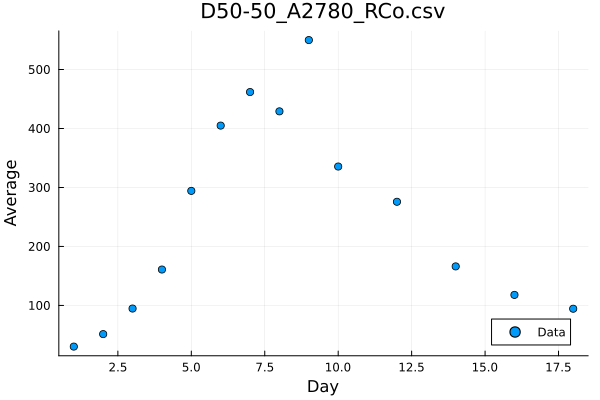

This is what the data looks like:
14×2 DataFrame
 Row │ Day    Average  
     │ Int64  Float64  
─────┼─────────────────
   1 │     1   16.2638
   2 │     2   23.2423
   3 │     3   36.2432
   4 │     4   61.6331
   5 │     5  118.371
   6 │     6  116.005
   7 │     7  105.931
   8 │     8  165.009
   9 │     9  167.83
  10 │    10  118.492
  11 │    12   92.963
  12 │    14   75.1611
  13 │    16   43.3058
  14 │    18   36.217


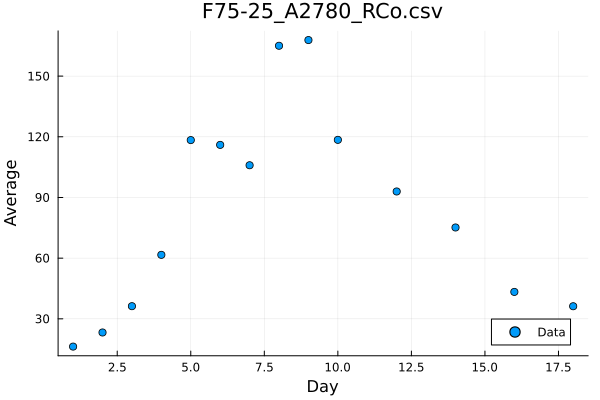

This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average   
     │ Int64  Float64   
─────┼──────────────────
   1 │     1    56.1351
   2 │     2   100.291
   3 │     3   191.667
   4 │     4   382.989
   5 │     5   838.132
   6 │     6  1649.03
   7 │     7  1729.68
   8 │     8  2555.79
   9 │    10  2799.94
  10 │    12  3158.15
  11 │    14  3287.12
  12 │    16  3210.11
  13 │    18  3478.79


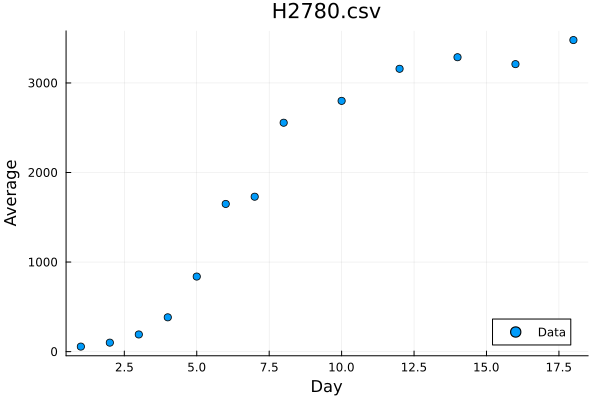

This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average 
     │ Int64  Float64 
─────┼────────────────
   1 │     1  132.7
   2 │     2  157.541
   3 │     3  277.995
   4 │     4  295.555
   5 │     5  415.468
   6 │     6  395.236
   7 │     7  552.896
   8 │     8  618.444
   9 │    10  570.302
  10 │    12  753.722
  11 │    14  554.971
  12 │    16  560.651
  13 │    18  310.117


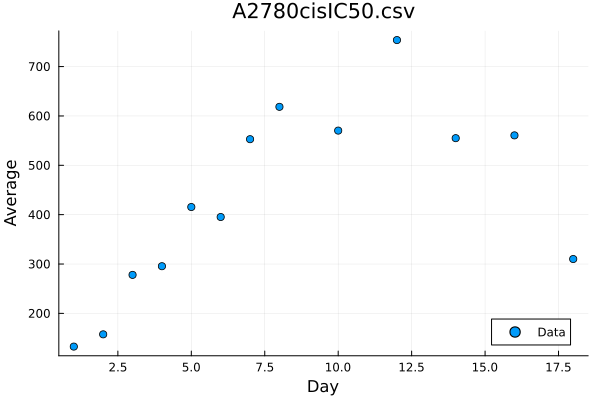

This is what the data looks like:
14×2 DataFrame
 Row │ Day    Average  
     │ Int64  Float64  
─────┼─────────────────
   1 │     1    71.83
   2 │     2   160.846
   3 │     3   405.834
   4 │     4  1001.57
   5 │     5  1871.96
   6 │     6  2486.45
   7 │     7  2688.92
   8 │     8  2896.87
   9 │     9  3109.35
  10 │    10  3446.71
  11 │    12  3624.35
  12 │    14  3580.64
  13 │    16  3655.45
  14 │    18  3813.88


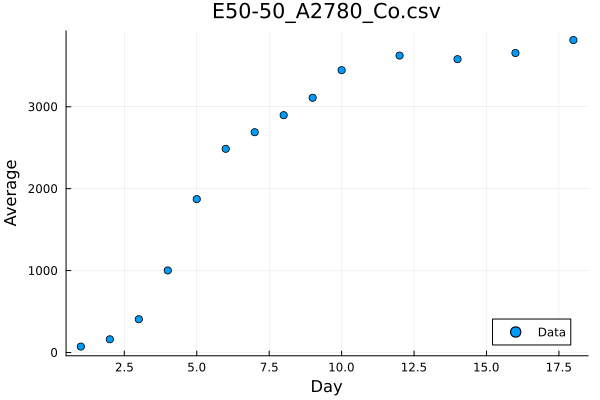

This is what the data looks like:
14×2 DataFrame
 Row │ Day    Average  
     │ Int64  Float64  
─────┼─────────────────
   1 │     1   104.589
   2 │     2   243.071
   3 │     3   541.95
   4 │     4  1367.99
   5 │     5  2144.13
   6 │     6  2788.21
   7 │     7  3038.57
   8 │     8  3265.6
   9 │     9  3435.12
  10 │    10  3571.59
  11 │    12  3638.14
  12 │    14  3617.92
  13 │    16  3586.52
  14 │    18  3446.04


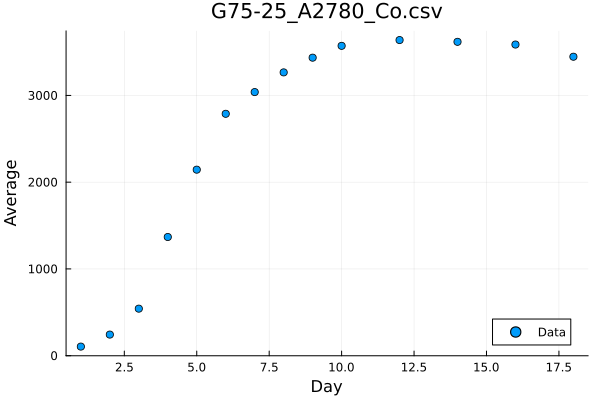

This is what the data looks like:
14×2 DataFrame
 Row │ Day    Average   
     │ Int64  Float64   
─────┼──────────────────
   1 │     1    32.1749
   2 │     2    61.7988
   3 │     3   100.548
   4 │     4   223.911
   5 │     5   456.882
   6 │     6   721.999
   7 │     7   957.223
   8 │     8  1013.7
   9 │     9  1631.18
  10 │    10  1123.72
  11 │    12   783.557
  12 │    14   415.481
  13 │    16   377.156
  14 │    18   325.837


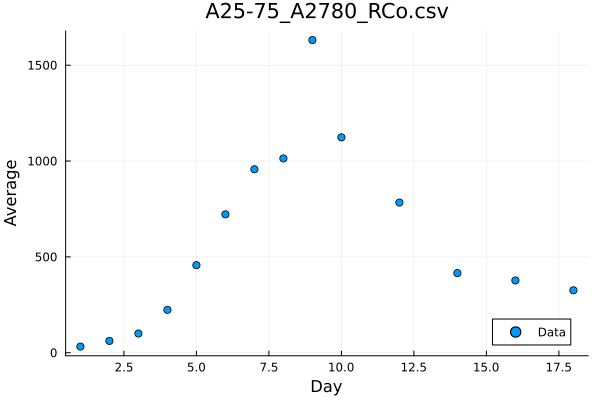

This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average   
     │ Int64  Float64   
─────┼──────────────────
   1 │     1  200.132
   2 │     2  227.575
   3 │     3  276.157
   4 │     4  177.241
   5 │     5  129.709
   6 │     6  107.86
   7 │     7   86.1512
   8 │     8   75.0421
   9 │    10   35.2887
  10 │    12   14.2671
  11 │    14    7.28465
  12 │    16    7.95696
  13 │    18   18.5772


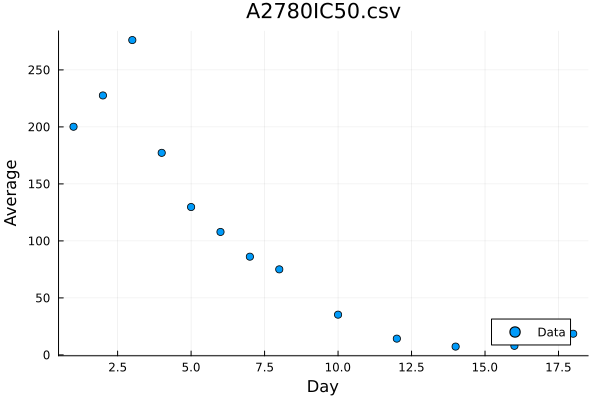

This is what the data looks like:
14×2 DataFrame
 Row │ Day    Average   
     │ Int64  Float64   
─────┼──────────────────
   1 │     1    27.3901
   2 │     2    54.9826
   3 │     3   149.388
   4 │     4   400.175
   5 │     5   867.137
   6 │     6  1280.0
   7 │     7  1710.94
   8 │     8  1910.82
   9 │     9  2375.55
  10 │    10  2991.2
  11 │    12  3054.77
  12 │    14  2825.33
  13 │    16  3053.46
  14 │    18  3464.12


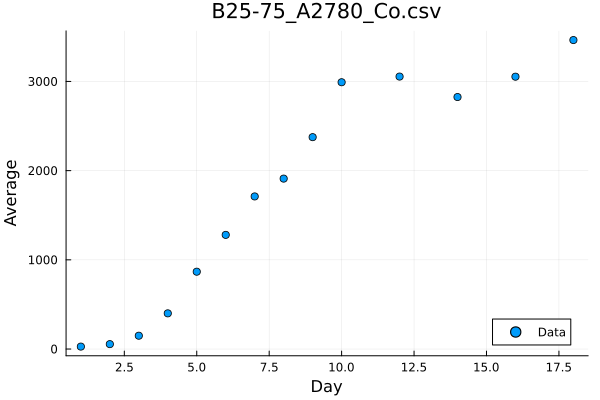

This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average   
     │ Int64  Float64   
─────┼──────────────────
   1 │     1    25.5207
   2 │     2    51.0255
   3 │     3    86.2546
   4 │     4   148.615
   5 │     5   290.117
   6 │     6   500.386
   7 │     7  1037.61
   8 │     8  1475.98
   9 │    10  1931.84
  10 │    12  2473.19
  11 │    14  3011.94
  12 │    16  3114.24
  13 │    18  3070.84


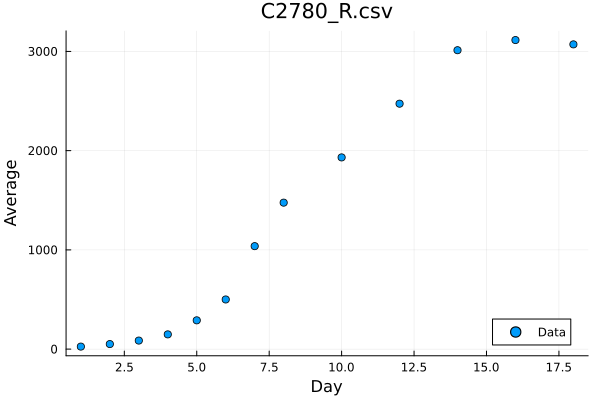

In [30]:
using Plots

# assume you already did:
#   datasets = load_csv_files_with_logging(files, data_path)

for (file, df) in datasets
    try
        # extract_day_averages_from_df returns two Float64 vectors: x (days), y (averages)
        x, y = extract_day_averages_from_df(df, 157.7)
        
        # make a simple scatter for this file
        plt = scatter(
            x, y;
            label   = "Data",
            xlabel  = "Day",
            ylabel  = "Average",
            title   = file,
            legend  = :bottomright
        )
        display(plt)
        
    catch e
        @warn "Skipping $file: failed to extract/plot" exception=(e, catch_backtrace())
    end
end



=== Fitting naive cells (H2780) ===
This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average        
     │ Int64  Float64        
─────┼───────────────────────
   1 │     1    8852.5
   2 │     2   15815.9
   3 │     3   30225.9
   4 │     4   60397.4
   5 │     5       1.32173e5
   6 │     6       2.60052e5
   7 │     7       2.72771e5
   8 │     8       4.03049e5
   9 │    10       4.41551e5
  10 │    12       4.98041e5
  11 │    14       5.18378e5
  12 │    16  506234.0
  13 │    18       5.48606e5
→ Optimized params: [0.7505270395652427, 500000.0]
→ SSR: 7.283946049365692e9
→ BIC: 267.00175876460634


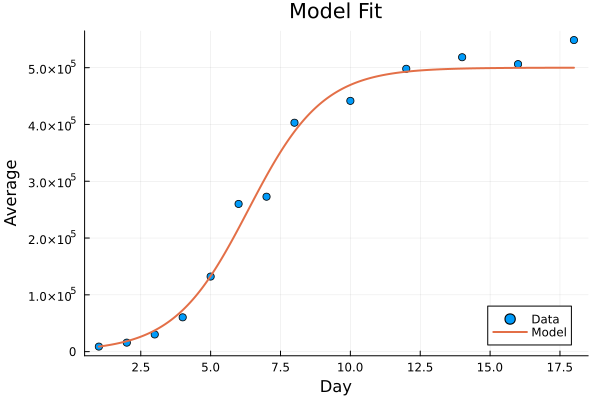


=== Fitting resistant cells (C2780_R) ===
This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average       
     │ Int64  Float64       
─────┼──────────────────────
   1 │     1   4024.61
   2 │     2   8046.73
   3 │     3  13602.3
   4 │     4  23436.6
   5 │     5  45751.5
   6 │     6  78910.9
   7 │     7      1.63632e5
   8 │     8      2.32763e5
   9 │    10      3.04652e5
  10 │    12      3.90021e5
  11 │    14      4.74983e5
  12 │    16      4.91116e5
  13 │    18      4.84272e5
→ Optimized params: [0.6326447981899693, 475900.8725637747]
→ SSR: 5.702711322425134e9
→ BIC: 263.82025546872455


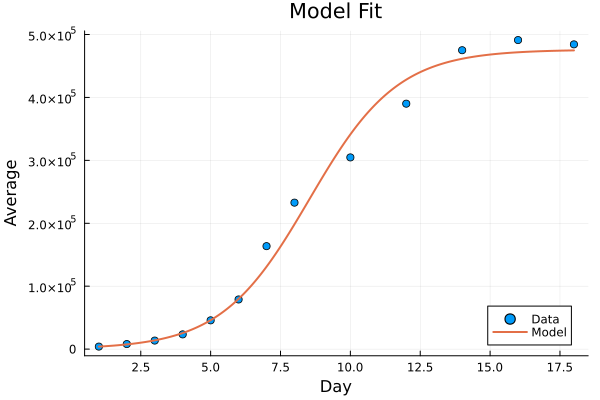

In [33]:
# ────────────────────────────────────────────────────────────────────────────
#  Fit logistic growth to untreated naive & resistant cells
# ────────────────────────────────────────────────────────────────────────────

# initial guess for [r, K]  – adjust as needed
p0 = [0.1, 25_000.0]

# common bounds for (r, K)
bounds = [(0.0, 500_000), (0.0, 500_000)]

# 1) Naive cells (H2780.csv)
println("\n=== Fitting naive cells (H2780) ===")
fit_naive = run_single_fit(
    datasets["H2780.csv"], p0;
    cell_size  = 157.7,        # <— name the keyword
    model      = logistic!,    # your logistic growth function
    bounds     = bounds,
    show_stats = true
)

# 2) Resistant cells (C2780_R.csv)
println("\n=== Fitting resistant cells (C2780_R) ===")
fit_resist = run_single_fit(
    datasets["C2780_R.csv"], p0;
    cell_size  = 157.7,        # <— name the keyword
    model      = logistic!,
    bounds     = bounds,
    show_stats = true
)

println()


=== Fitting A2780 IC₅₀ drug effect ===
This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average  
     │ Int64  Float64  
─────┼─────────────────
   1 │     1  31560.8
   2 │     2  35888.6
   3 │     3  43550.0
   4 │     4  27950.9
   5 │     5  20455.1
   6 │     6  17009.6
   7 │     7  13586.0
   8 │     8  11834.1
   9 │    10   5565.03
  10 │    12   2249.91
  11 │    14   1148.79
  12 │    16   1254.81
  13 │    18   2929.62


┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/Pma4a/src/integrator_interface.jl:589
┌ Warning: At t=1.0, dt was forced below floating point epsilon 2.220446049250313e-16, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/Pma4a/src/integrator_interface.jl:623
┌ Warning: At t=1.0, dt was forced below floating point epsilon 2.220446049250313e-16, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or 

→ Optimized params: [Inf, 9.949708683014771, Inf]
→ SSR: 5.420788345098964e9
→ BIC: 265.72609863368587


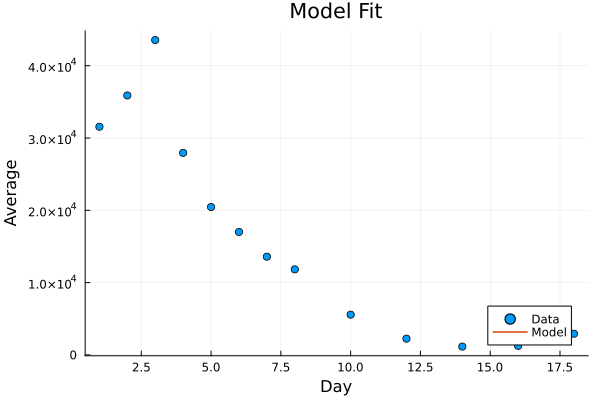


=== Fitting A2780cis IC₅₀ drug effect ===
This is what the data looks like:
13×2 DataFrame
 Row │ Day    Average       
     │ Int64  Float64       
─────┼──────────────────────
   1 │     1  20926.7
   2 │     2  24844.2
   3 │     3  43839.8
   4 │     4  46609.0
   5 │     5  65519.2
   6 │     6  62328.8
   7 │     7  87191.7
   8 │     8  97528.7
   9 │    10  89936.6
  10 │    12      1.18862e5
  11 │    14  87518.9
  12 │    16  88414.6
  13 │    18  48905.4


┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase ~/.julia/packages/SciMLBase/Pma4a/src/integrator_interface.jl:589
┌ Warning: At t=1.0, dt was forced below floating point epsilon 2.220446049250313e-16, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/Pma4a/src/integrator_interface.jl:623


→ Optimized params: [Inf, 4.381741774003517, Inf]
→ SSR: 3.928706880226784e10
→ BIC: 291.47460285174884


┌ Warning: At t=1.0, dt was forced below floating point epsilon 2.220446049250313e-16, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/Pma4a/src/integrator_interface.jl:623


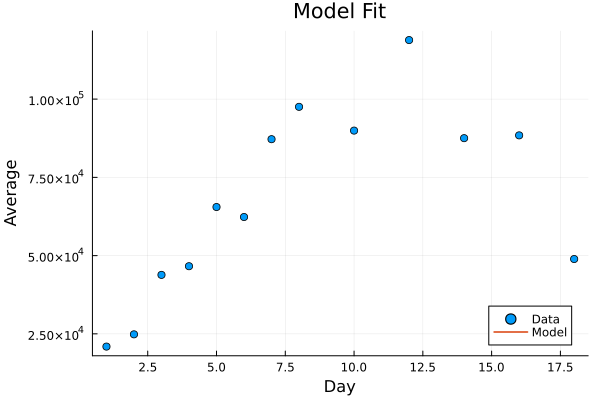

(params = [Inf, 4.381741774003517, Inf], bic = 291.47460285174884, ssr = 3.928706880226784e10, sol = ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Vector{Float64}, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.Ordi

In [34]:
# ────────────────────────────────────────────────────────────────────────────
#  Fit Hill-effect (γ, n, t_half) to IC₅₀ dose–response curves
# ────────────────────────────────────────────────────────────────────────────

# 1) unpack your previously fitted growth params:
r_naive,  K_naive  = fit_naive.params     # from H2780.csv
r_resist, K_resist = fit_resist.params    # from C2780_R.csv

# 2) initial guess for the Hill parameters [γ, n, t_half]
p0_hill    = [100.0, 1.0, 1.0]    # you may need to adjust these
# 3) bounds for γ ≥ 0, 0.1 ≤ n ≤ 10, t_half ≥ 0
bounds_hill = [(0.0, Inf), (0.1, 10.0), (0.0, Inf)]

# 4) fit A2780 (parental) IC₅₀
println("\n=== Fitting A2780 IC₅₀ drug effect ===")
fit_ic50_A = run_single_fit(
    datasets["A2780IC50.csv"], p0_hill;
    cell_size     = 157.7,
    model         = hill_effect_treatment!,
    fixed_params  = [r_naive, K_naive],
    bounds        = bounds_hill,
    show_stats    = true
)

# 5) fit A2780cis (resistant) IC₅₀
println("\n=== Fitting A2780cis IC₅₀ drug effect ===")
fit_ic50_cis = run_single_fit(
    datasets["A2780cisIC50.csv"], p0_hill;
    cell_size     = 157.7,
    model         = hill_effect_treatment!,
    fixed_params  = [r_resist, K_resist],
    bounds        = bounds_hill,
    show_stats    = true
)